In [7]:
import gezi
import numpy as np

In [8]:
img_path = '/home/gezi/data/suichang/suichang_round1_train_210120/000001.tif'

In [9]:
import skimage.io as skimg_io
x = skimg_io.imread(img_path)

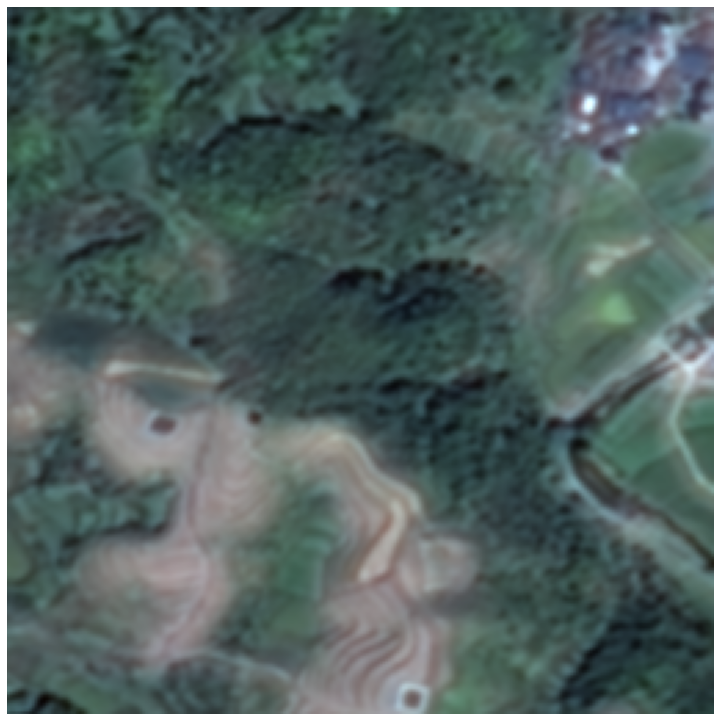

In [10]:
r = gezi.plot.display_images(x[:,:,:3])

In [18]:
import cv2
x2 = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
# x2 = cv2.cvtColor(x2, cv2.COLOR_BGR2RGB)
x2 = x2.astype(np.uint8)

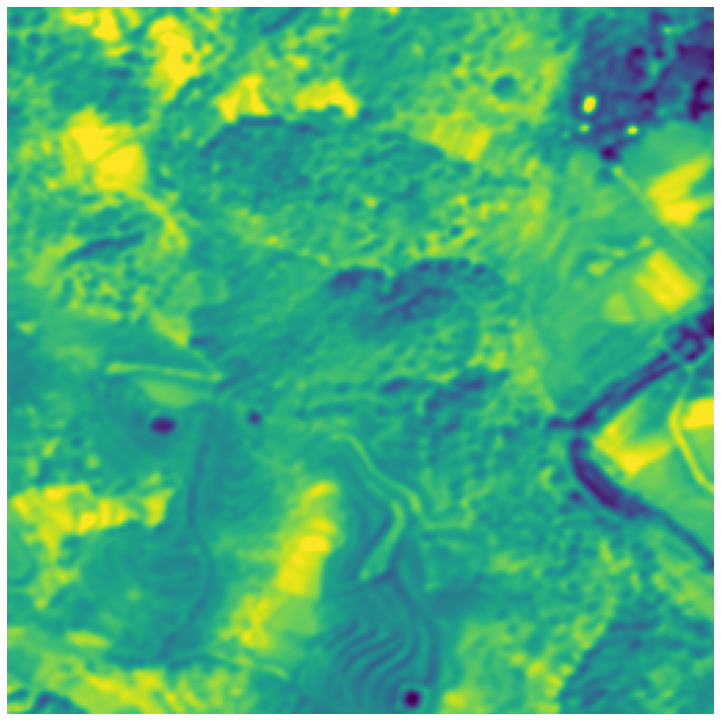

In [29]:
r = gezi.plot.display_images(x2[:,:,3:])

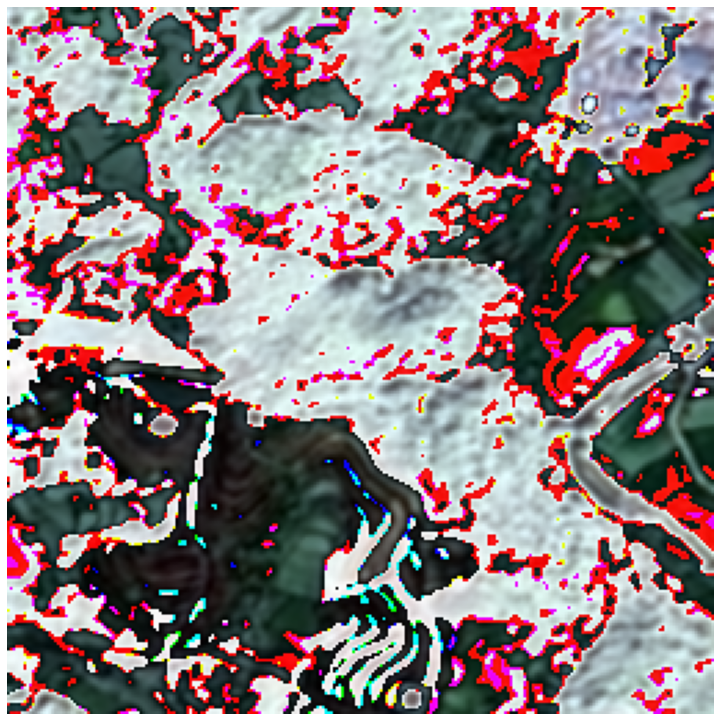

In [32]:
r = gezi.plot.display_images(x[:,:,3:] + x[:,:,:3])

In [49]:
import skimage.io as skimg_io
x = skimg_io.imread(img_path)
x.shape

(256, 256, 4)

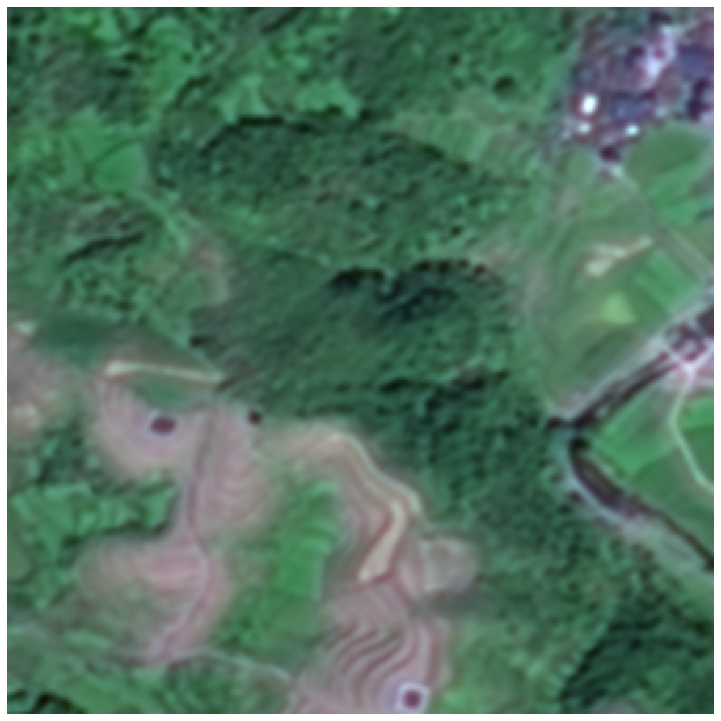

In [55]:
y = np.zeros_like(x[:,:,:3])
y += x[:, :, :3]
alpha = 0.25
y[:,:,1] = y[:,:,1] * (1 - alpha) + x[:,:,3] * alpha
r = gezi.plot.display_images(y)

In [20]:
from PIL import Image 
x3 =  Image.open(img_path).convert("RGB")

In [25]:
np.array(x3)[:,:,0]

array([[ 46,  43,  38, ..., 104, 106, 106],
       [ 50,  46,  40, ..., 110, 114, 116],
       [ 52,  45,  38, ..., 116, 122, 126],
       ...,
       [ 65,  65,  67, ...,  37,  40,  42],
       [ 67,  64,  65, ...,  37,  40,  44],
       [ 57,  51,  51, ...,  40,  41,  43]], dtype=uint8)

In [31]:
x[:,:,3]

array([[158, 152, 140, ...,  80,  74,  70],
       [168, 158, 145, ...,  84,  83,  84],
       [174, 158, 141, ...,  89,  93,  98],
       ...,
       [216, 215, 218, ..., 138, 144, 148],
       [223, 215, 217, ..., 139, 146, 154],
       [204, 190, 189, ..., 146, 148, 153]], dtype=uint8)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ln -s /content/drive/My\ Drive/ /content/mine
import sys
sys.path.append('/content/mine/projects/pikachu/utils')
sys.path.append('/content/mine/projects/pikachu')

In [ ]:
!pip -q install pymp-pypi
!pip -q install qgrid

In [ ]:
import os
import glob
import traceback
from datetime import datetime
import pandas as pd
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
plotly.offline.init_notebook_mode(connected=True)
import gezi
from gezi import tqdm, line
import pymp
from multiprocessing import Pool, Manager, cpu_count 
import qgrid

In [ ]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
def gen_df(root):
  dfs= Manager().list()
  pattern = f'{root}/*/metrics.csv'
  files = glob.glob(pattern)
  files = sorted(files, key=lambda x: os.path.getmtime(x))
  ps = min(len(files), cpu_count())
  with pymp.Parallel(ps) as p:
    for i in tqdm(p.range(len(files)),desc='offline'):
      file = files[i]
      if not gezi.non_empty(file):
        continue
      df = pd.read_csv(file)
      df['model'] = os.path.basename(os.path.dirname(file))
      df['mtime'] = os.path.getmtime(file)
      df['ctime'] = os.path.getctime(file)
      dfs.append(df)
  df = pd.concat(list(dfs))
  return df

In [ ]:
root = '/content/mine/working/'
root += 'mind/v3'
df = gen_df(root)

In [ ]:
df

In [ ]:
# models = [(x, df[df.model==x]['Metrics/auc'].values[-1])  for x in set(df.model)]
models = [(x, df[df.model==x]['ctime'][0]) for x in set(df.model)]
models.sort(key=lambda x: -x[-1])
models_ = [x[0] for x in models[:30]]
models_

In [ ]:
# models  = set(x for x in set(df.model.values) if df[df.model==x]['Metrics/auc'].max() > 0.703)

In [ ]:
metrics = [x for x in df.columns if x.startswith('Metrics/')]

In [ ]:
df_ = df[df.model.isin(models_)]
metrics = ['Metrics/auc', 'Metrics/mrr', 'Metrics/ndcg5', 'Metrics/ndcg10', 'Metrics/loss', 'Metrics/global_auc/new_doc']
# gezi.line(df_, 'step', metrics)
line(df_, 'step', metrics)

In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go

gezi.enable_plotly_in_cell()

data = [
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    )
]
iplot(data)

In [ ]:
# def enable_plotly_in_cell():
#   import IPython
#   from plotly.offline import init_notebook_mode
#   display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
#   init_notebook_mode(connected=False)

In [ ]:
from plotly.offline import iplot
import plotly.graph_objs as go
gezi.enable_plotly_in_cell()

data = [
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    )
]
iplot(data)